In [41]:
require(tidyverse)
require(party)
require(mgcv)
require(lattice)
require(languageR)
require(repr)
require(itsadug)

Loading required package: itsadug

Loading required package: plotfunctions


Attaching package: 'plotfunctions'


The following object is masked from 'package:ggplot2':

    alpha


Loaded package itsadug 2.4 (see 'help("itsadug")' ).


Attaching package: 'itsadug'


The following object is masked from 'package:modeltools':

    info




## Naming data

Chang, Y.-N., Hsu, C.-H., Tsai, J.-L., Chen, C.-L., & Lee, C.-Y. (2016). A psycholinguistic database for traditional Chinese character naming. Behavior Research Methods, 48(1), 112-122. (SSCI)
https://pubmed.ncbi.nlm.nih.gov/25630311/

In [2]:
msyl = read_csv("../data/sense_graph/sense_graph_monosyll.csv")

Parsed with column specification:
cols(
  mw = col_character(),
  mw_nV = col_double(),
  mw_nE = col_double(),
  mw_weightD = col_double(),
  mw_D = col_double()
)



In [23]:
naming = read_csv("../data/naming_sense_indices.csv")
naming$log_freq = log(naming$Frequency)
naming$RTinv = -1000/naming$RT
naming$sf_rmax = log((naming$sfreq_max+1) / (naming$sfreq_sum+1))
naming = merge(naming, msyl, by.x="Character", by.y="mw")
naming$rEV = log(naming$mw_nE+1)-log(naming$mw_nV+1)

Parsed with column specification:
cols(
  .default = col_double(),
  Character = col_character(),
  zhuyin = col_character(),
  `Phonetic Component` = col_character(),
  `Semantic Component` = col_character(),
  word = col_character()
)

See spec(...) for full column specifications.



In [24]:
dim(naming)

[1] 1217   38

In [25]:
names(naming)

[1] "Character"                 "zhuyin"                   
 [3] "Phonetic Component"        "Semantic Component"       
 [5] "Frequency"                 "Consistency (type)"       
 [7] "Consistency (token)"       "Regularity"               
 [9] "Homophone Density"         "Phonetic Combinability"   
[11] "Semantic Combinability"    "Stroke"                   
[13] "Familiarity"               "Semantic Ambiguity Rating"
[15] "NC1"                       "NC2"                      
[17] "Naming Acc"                "RT"                       
[19] "word"                      "n_sense"                  
[21] "log_n_sense"               "n_tagged"                 
[23] "sfreq_sum"                 "sfreq_max"                
[25] "sfreq_std"                 "sfreq_ent"                
[27] "sfreq_ent_norm"            "vol_raw"                  
[29] "vol_cen"                   "vol_cennorm"              
[31] "log_freq"                  "RTinv"                    
[33] "sf_rmax"                   "mw_nV"                    
[35] "mw_nE"                     "mw_weightD"               
[37] "mw_D"                      "rEV"

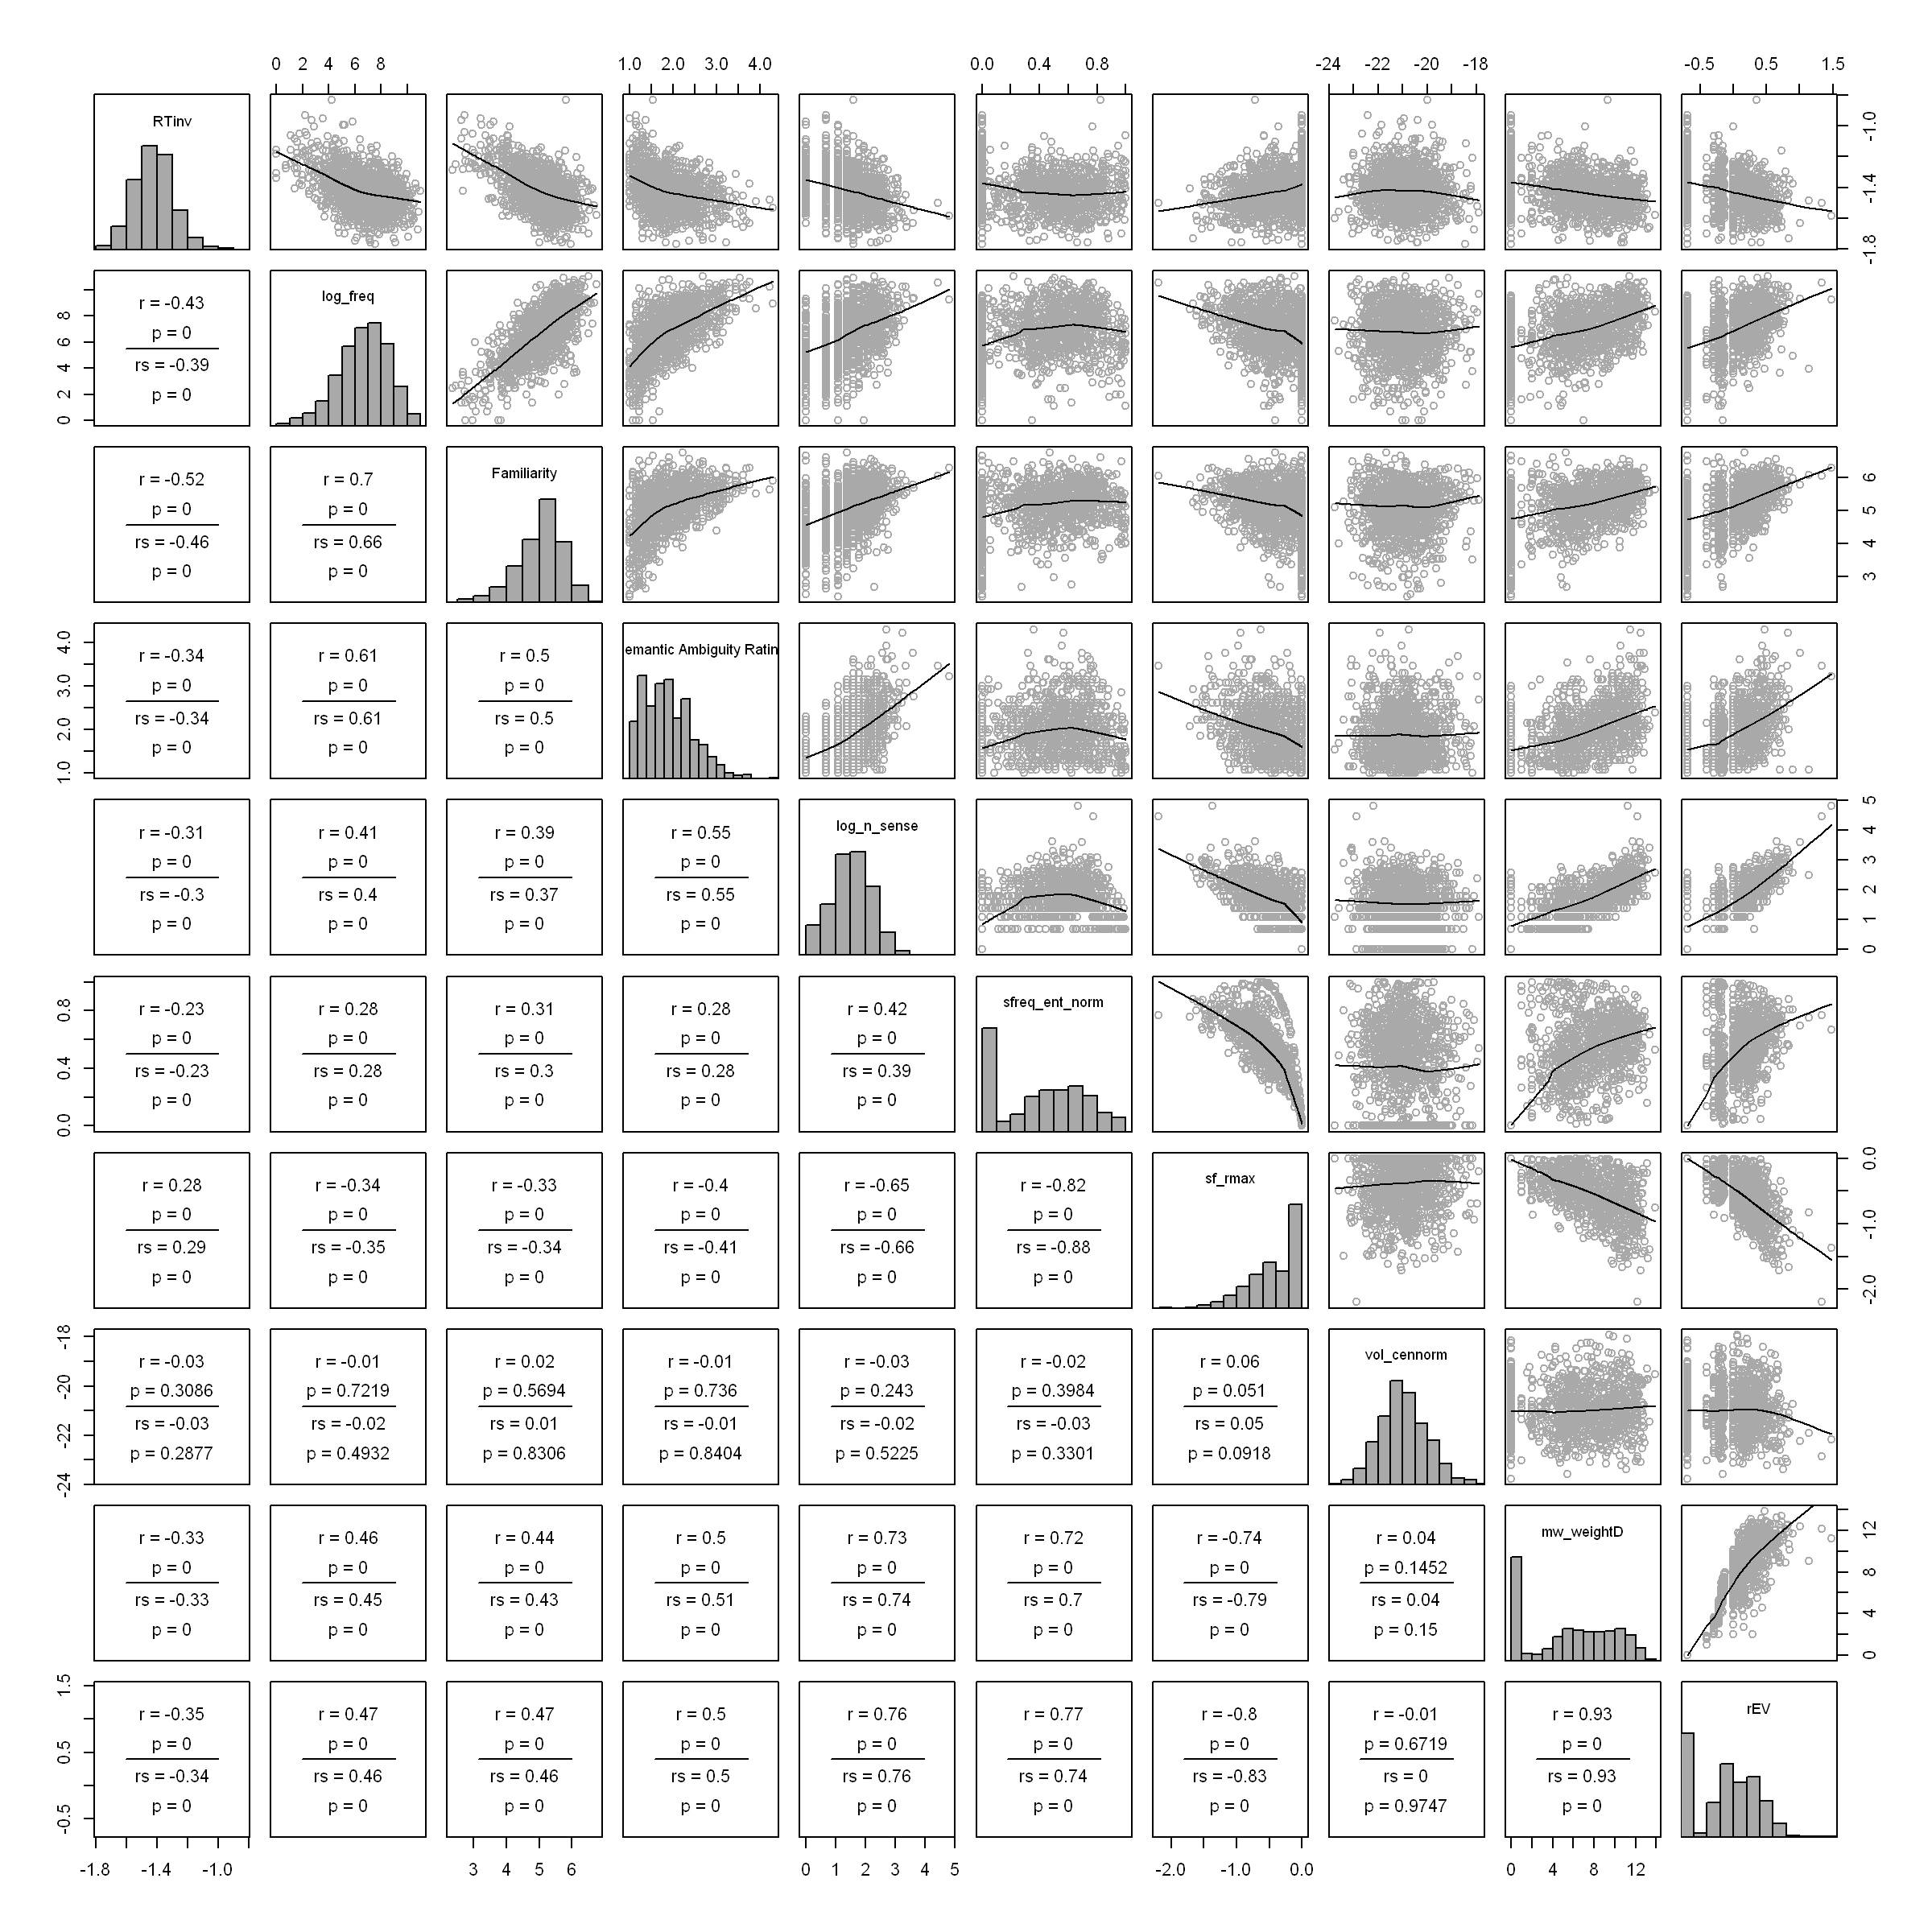

In [26]:
naming_variables = c("RTinv", "log_freq",
                       "Familiarity", "Semantic Ambiguity Rating",
                       "log_n_sense", "sfreq_ent_norm", "sf_rmax", "vol_cennorm",
                       "mw_weightD", "rEV")
options(repr.plot.width=12, repr.plot.height=12)

pairscor.fnc(naming[,c(naming_variables)])

In [28]:
## helper function to plot interaction
popt = function(w, h, r=200) { options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r) }
plot_int = function(model, idx, x, y, ...){
    popt(12, 6)
    par(mfrow=c(1,2))
    plot(model, select=idx, lwd=2, ...)
    vis.gam(model, view=c(x, y), plot.type="contour", color="topo", too.far=0.1, ...)
}

In [27]:
naming.vars = c("RTinv", 
        "log_n_sense", "sfreq_ent_norm", "vol_cennorm",
        "mw_weightD", "rEV")
naming.RT.cf <- cforest(RTinv ~ ., data=naming[,naming.vars])
naming.RT.varimp = varimp(naming.RT.cf)

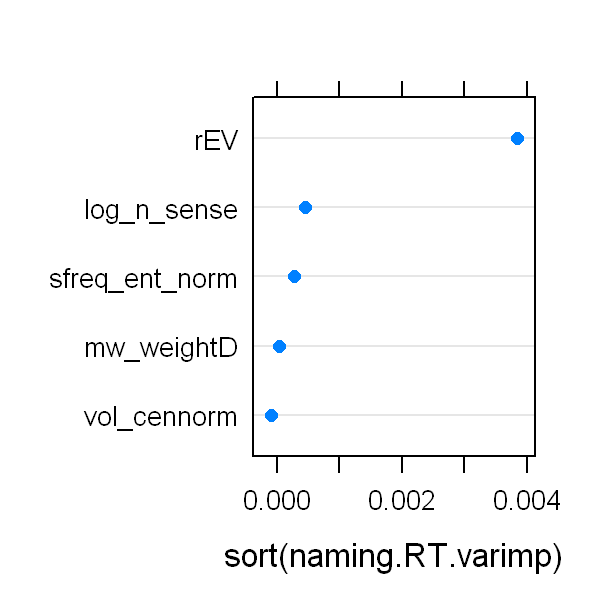

In [29]:
popt(3,3)
dotplot(sort(naming.RT.varimp), main=list(cex=2))

In [69]:
m.01 = bam(RTinv~s(log_freq)+s(log_n_sense)+s(sfreq_ent_norm)+s(rEV), data=naming)

In [70]:
summary(m.01)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm) + s(rEV)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.420015   0.003271  -434.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                    edf Ref.df      F p-value    
s(log_freq)       3.864  4.839 36.499 < 2e-16 ***
s(log_n_sense)    1.000  1.000  1.424 0.23293    
s(sfreq_ent_norm) 1.000  1.000  0.133 0.71505    
s(rEV)            1.000  1.000  7.179 0.00748 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.235   Deviance explained =   24%
fREML = -891.35  Scale est. = 0.013021  n = 1217

In [71]:
concurvity(m.01)

,para,s(log_freq),s(log_n_sense),s(sfreq_ent_norm),s(rEV)
worst,7.567851e-20,0.2639595,0.9904539,0.9772046,0.9905351
observed,7.567851e-20,0.2182586,0.6593875,0.7498160,0.8885286
estimate,7.567851e-20,0.1658200,0.5361839,0.7604780,0.8490422


In [107]:
m.02 = bam(RTinv~s(log_freq)+s(log_n_sense)+s(sfreq_ent_norm), data=naming)

In [108]:
summary(m.02)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.420015   0.003277  -433.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                    edf Ref.df      F  p-value    
s(log_freq)       3.803  4.765 41.088  < 2e-16 ***
s(log_n_sense)    1.627  2.054  8.092 0.000294 ***
s(sfreq_ent_norm) 1.561  1.928  4.073 0.019809 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.232   Deviance explained = 23.7%
fREML = -891.87  Scale est. = 0.01307   n = 1217

In [109]:
compareML(m.01, m.02)

m.01: RTinv ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm) + s(rEV)

m.02: RTinv ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm)

Model m.02 preferred: lower fREML score (0.521), and lower df (2.000).
-----
  Model     Score Edf Difference    Df
1  m.01 -891.3490   9                 
2  m.02 -891.8704   7     -0.521 2.000

AIC difference: -7.44, model m.01 has lower AIC.



Warning message in compareML(m.01, m.02):
"Only small difference in fREML...
"


## Semantic Ambiguity

In [117]:
naming$sa = naming$`Semantic Ambiguity Rating`
naming.sa.vars = c("sa", 
        "log_n_sense", "sfreq_ent_norm", "vol_cennorm",
        "mw_weightD", "rEV")
naming.sa.cf <- cforest(sa ~ ., data=naming[,naming.sa.vars])
naming.sa.varimp = varimp(naming.sa.cf)

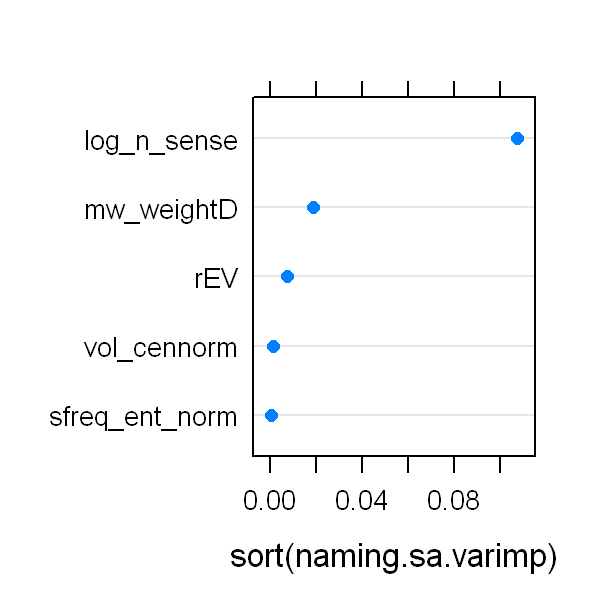

In [118]:
dotplot(sort(naming.sa.varimp), main=list(cex=2))

In [119]:
sa.01 = bam(sa~s(log_freq)+s(log_n_sense)+s(sfreq_ent_norm), data=naming)

In [120]:
summary(sa.01)


Family: gaussian 
Link function: identity 

Formula:
sa ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.90677    0.01154   165.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                    edf Ref.df      F p-value    
s(log_freq)       4.451  5.523 80.672  <2e-16 ***
s(log_n_sense)    2.614  3.331 74.300  <2e-16 ***
s(sfreq_ent_norm) 1.000  1.000  0.002   0.969    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.499   Deviance explained = 50.2%
fREML = 637.12  Scale est. = 0.16218   n = 1217

In [125]:
sa.02 = bam(sa~s(log_freq)+s(log_n_sense)+s(mw_weightD), data=naming)

In [126]:
summary(sa.02)


Family: gaussian 
Link function: identity 

Formula:
sa ~ s(log_freq) + s(log_n_sense) + s(mw_weightD)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.90677    0.01149     166   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df      F p-value    
s(log_freq)    4.591  5.683 72.534  <2e-16 ***
s(log_n_sense) 2.460  3.163 39.780  <2e-16 ***
s(mw_weightD)  3.391  4.169  2.701  0.0277 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.503   Deviance explained = 50.8%
fREML = 633.67  Scale est. = 0.16062   n = 1217

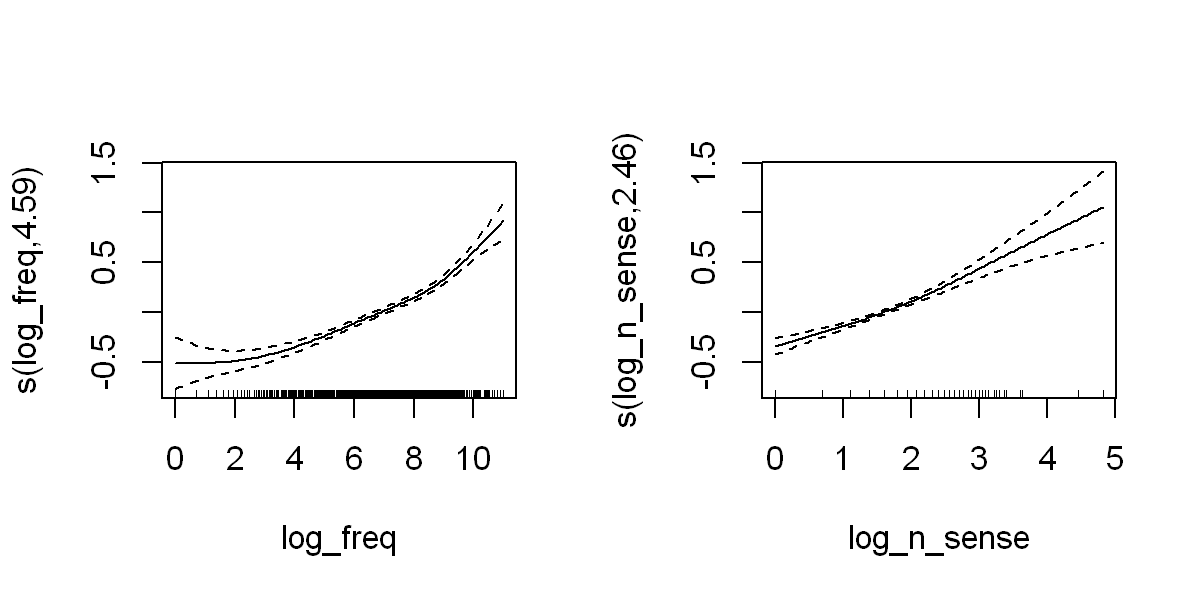

In [130]:
popt(6,3)
par(mfrow=c(1, 2))
plot(sa.02, select=1)
plot(sa.02, select=2)

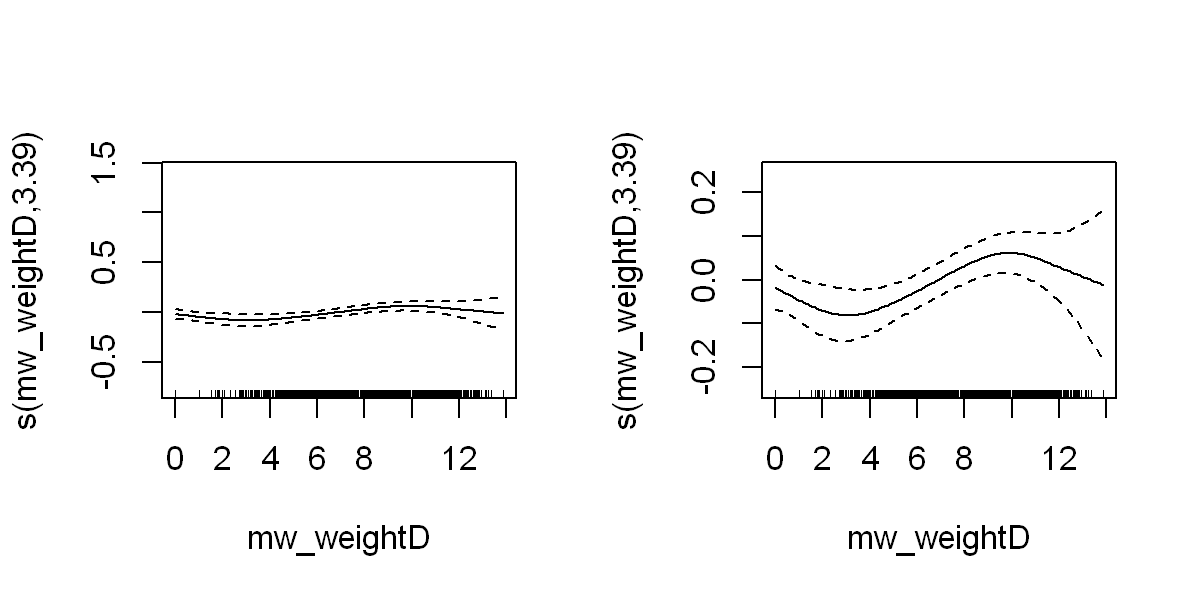

In [132]:
popt(6,3)
par(mfrow=c(1, 2))
plot(sa.02, select=3)
plot(sa.02, select=3, ylim=c(-0.25, 0.25))